<a href="https://colab.research.google.com/github/Vatsal-Patel-09/Machine_Learning_101/blob/main/LAB_6_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 Dimension Reduction – WBCD

 Dataset:

In [35]:
 from sklearn.datasets import load_breast_cancer
 # Load dataset
 data = load_breast_cancer()
 X =data.data
 y = data.target
 print("Original Shape:", X.shape)

Original Shape: (569, 30)


In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# define function for train test split and logistic regrression
def LogisticRegression_clasify_eval (X, y, method_name="Original"):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # logistic regression
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #matrix
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # print
    print(f"==== Method: {method_name} Evaluation ====")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()

    #visualize
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7, color="blue")
    plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7, color="red", marker = "x")
    plt.title(f"{method_name} Data Visualization")
    plt.xlabel("Sample Index ")
    plt.ylabel("Class")
    plt.legend()
    plt.show


    return {"Method" : method_name, "Accuracy": accuracy, "Precison": precision, "Recall": recall, "F1": f1}

### Exercise

#### PCA

==== Method: PCA Evaluation ====
Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
F1 Score: 0.981651376146789



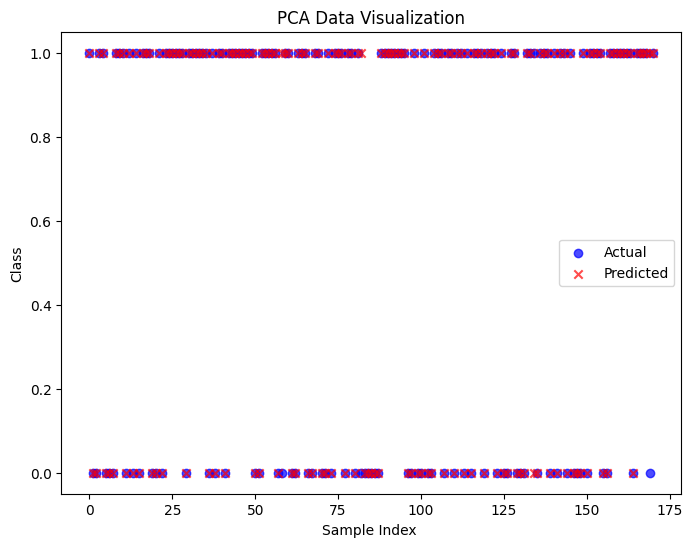

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_results = LogisticRegression_clasify_eval(X_pca, y, method_name="PCA")

#### LDA

==== Method: LDA Evaluation ====
Accuracy: 0.9883040935672515
Precision: 0.9907407407407407
Recall: 0.9907407407407407
F1 Score: 0.9907407407407407



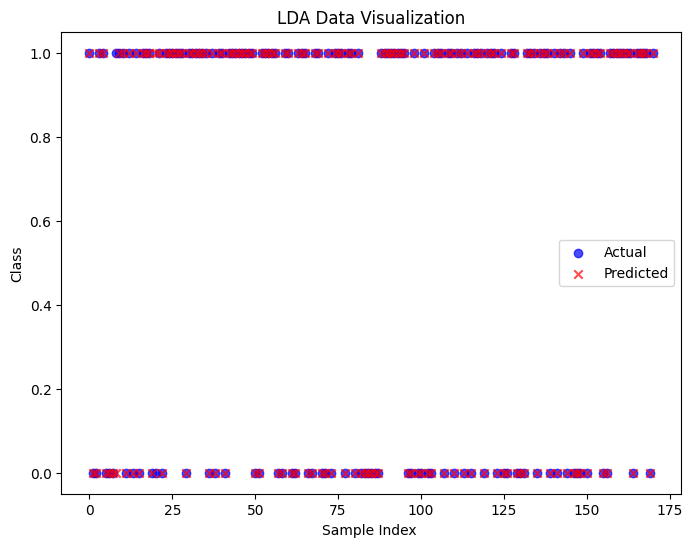

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

lda_results = LogisticRegression_clasify_eval(X_lda, y, method_name="LDA")

#### T-SNE

==== Method: T-SNE Evaluation ====
Accuracy: 0.9298245614035088
Precision: 0.9285714285714286
Recall: 0.9629629629629629
F1 Score: 0.9454545454545454



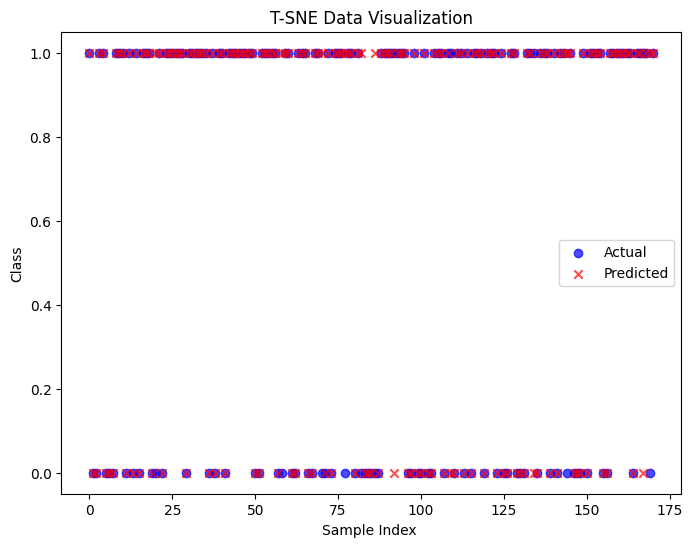

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

tsne_results = LogisticRegression_clasify_eval(X_tsne, y, method_name="T-SNE")